The analysis is divided into four main parts:
- 1. Data Understanding
- 2. Data Handling and Cleaning(cleaning missing values, removing redundant cols etc.)
- 3. Data Analysis

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("Do_feature_engineering.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [102]:
df.shape

(32561, 15)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [104]:
#statistical summary of the dataframe
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Data Handling and Cleaning

In [105]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [106]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

There is no missing value in the columns.

In [107]:
round(100*(df['income'].value_counts()/len(df['income'])),2)

<=50K    75.92
>50K     24.08
Name: income, dtype: float64

The dataset contains a distribution of 75.92% entries labeled with <=50K and 24.08% entries labeled with >50K. To gain insights about which features would be most helpful for this assignment , we look at the feature and the distibution of entries that are labeled >50K and <=50K. 

In [108]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [109]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [110]:
#Dividing data in independent and target variable
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

### Univariate Analysis

In [111]:
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States


In [112]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numerical = X.select_dtypes(include=numerics)
df_numerical.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


In [113]:
#replace ? with None to find out null values
X = X.replace({'?': None})
X.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
dtype: int64

In [114]:
#Imputing Null Values with mode since values are missing in categorical columns only
X.fillna(X.mode().iloc[0],inplace = True)
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [115]:
X['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [116]:
X['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [117]:
X['occupation'].unique()

array(['Prof-specialty', 'Exec-managerial', 'Machine-op-inspct',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

### Outlier Treatment


In [118]:
##Checking outliers at 25%, 50%, 75%, 90%, 99% and above
X.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
90%,58.000000,3.290540e+05,13.000000,0.000000,0.000000,55.000000
95%,63.000000,3.796820e+05,14.000000,5013.000000,0.000000,60.000000
99%,74.000000,5.100720e+05,16.000000,15024.000000,1980.000000,80.000000


In [119]:
Y.describe(percentiles = [.25, .5, .75, .90, .95, .99])

count     32561
unique        2
top       <=50K
freq      24720
Name: income, dtype: object

<AxesSubplot:ylabel='hours.per.week'>

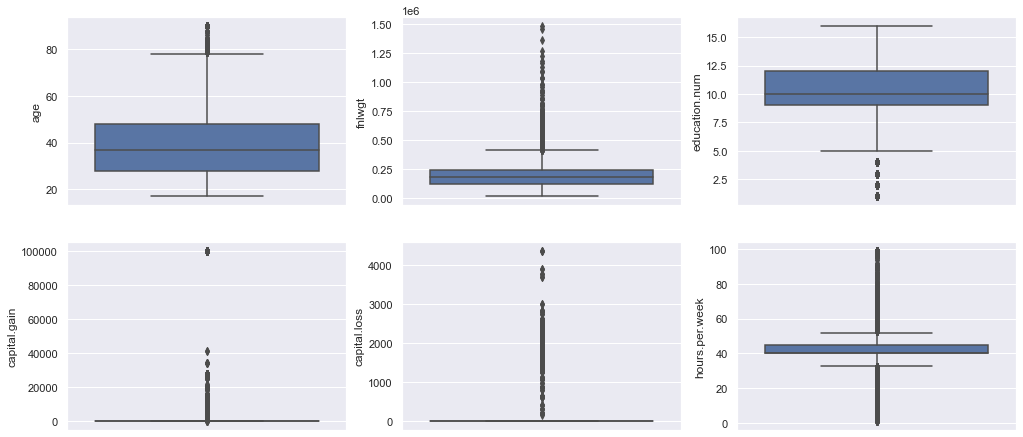

In [120]:
#Check for outliers in all the numeric features as for below features difference between mean & median and 75% and max is large
plt.figure(figsize=(17,20))
plt.subplot(5,3,1)
sns.boxplot(y = 'age', data = X)
plt.subplot(5,3,2)
sns.boxplot(y = 'fnlwgt', data = X)
plt.subplot(5,3,3)
sns.boxplot(y = 'education.num', data = X)
plt.subplot(5,3,4)
sns.boxplot(y = 'capital.gain', data = X)
plt.subplot(5,3,5)
sns.boxplot(y = 'capital.loss', data = X)
plt.subplot(5,3,6)
sns.boxplot(y = 'hours.per.week', data = X)


In [121]:
#extract categorical and numerical columns
categorical_feature = [feature for feature in X.columns if X[feature].dtypes == 'O']

In [122]:
numerical_feature = [feature for feature in X.columns if X[feature].dtypes != 'O']
numerical_feature

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

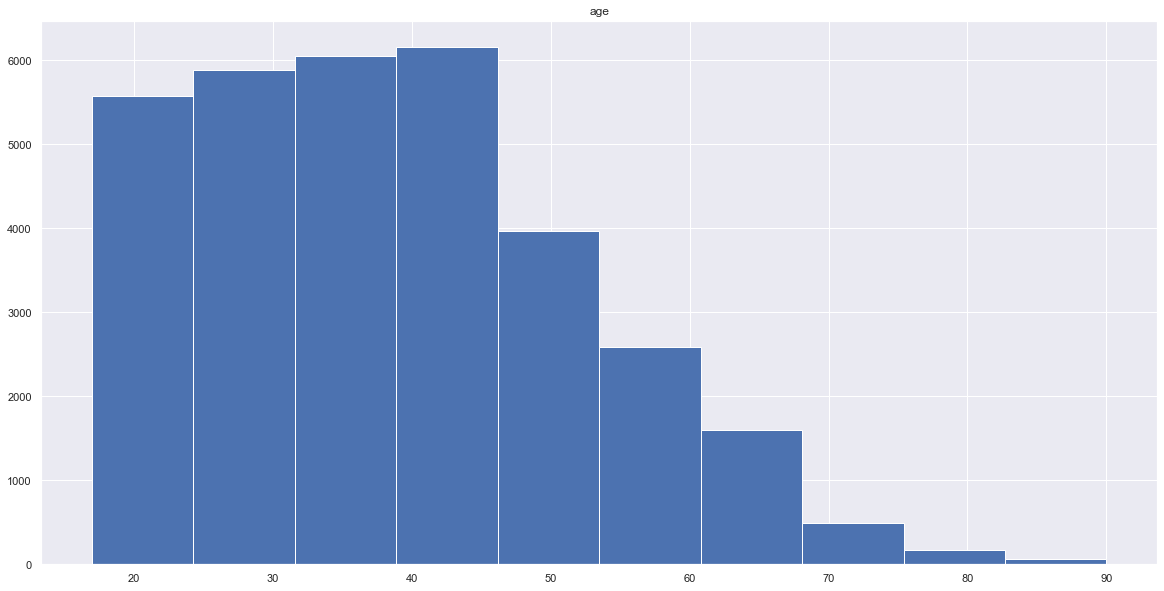

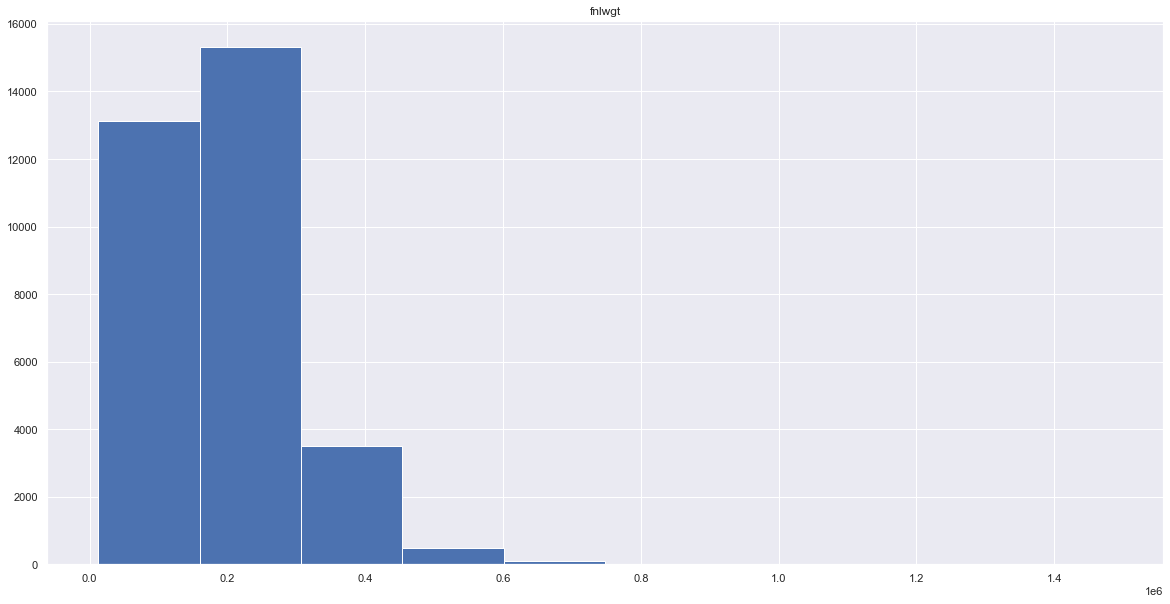

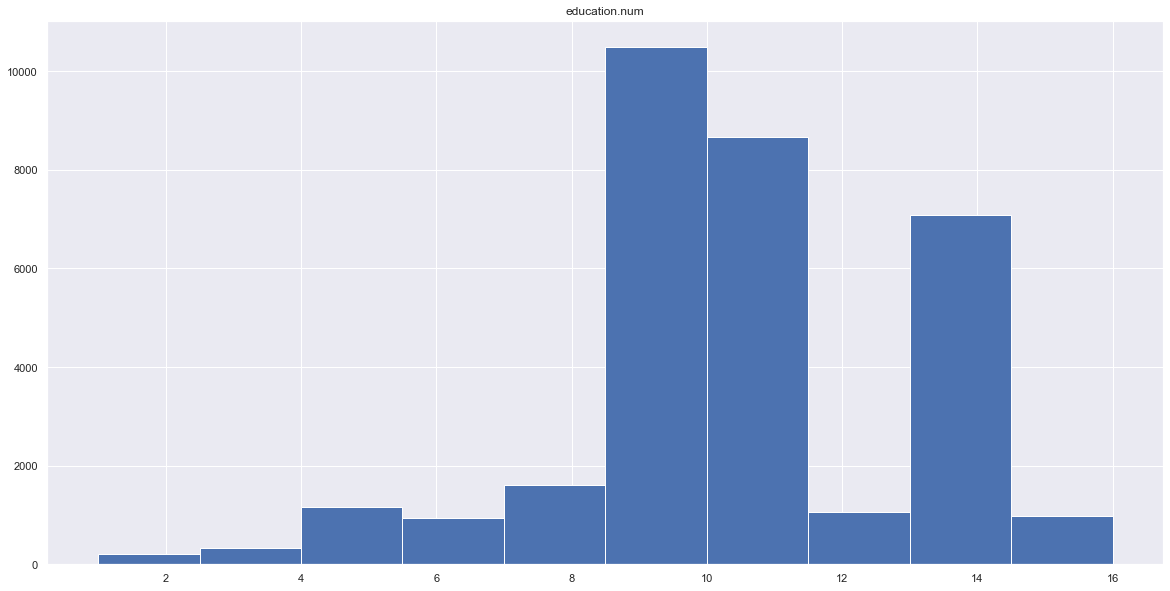

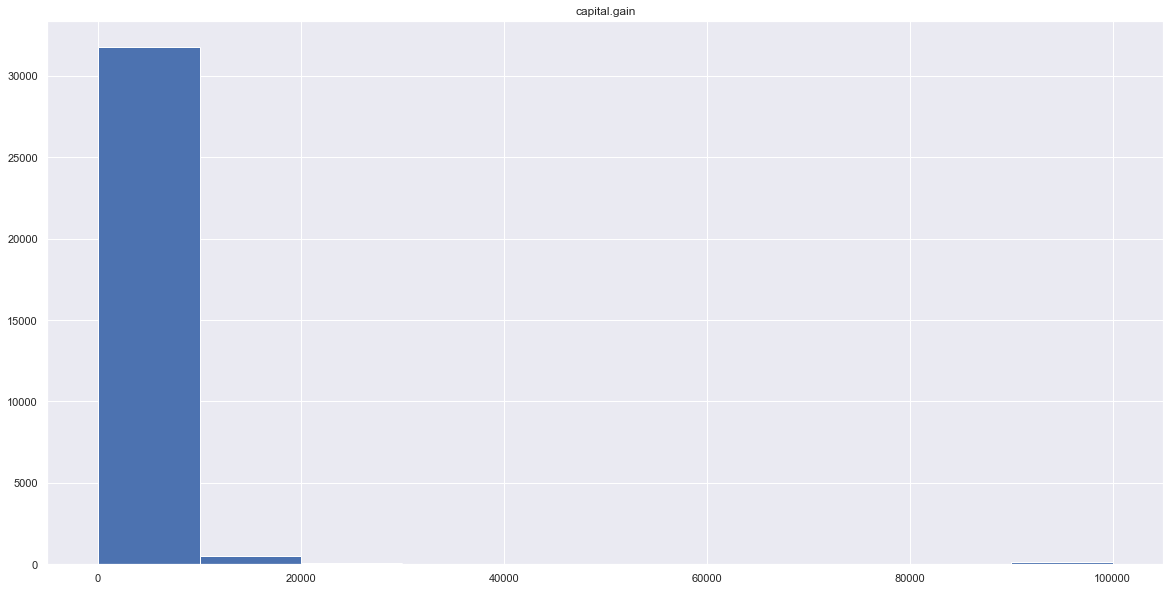

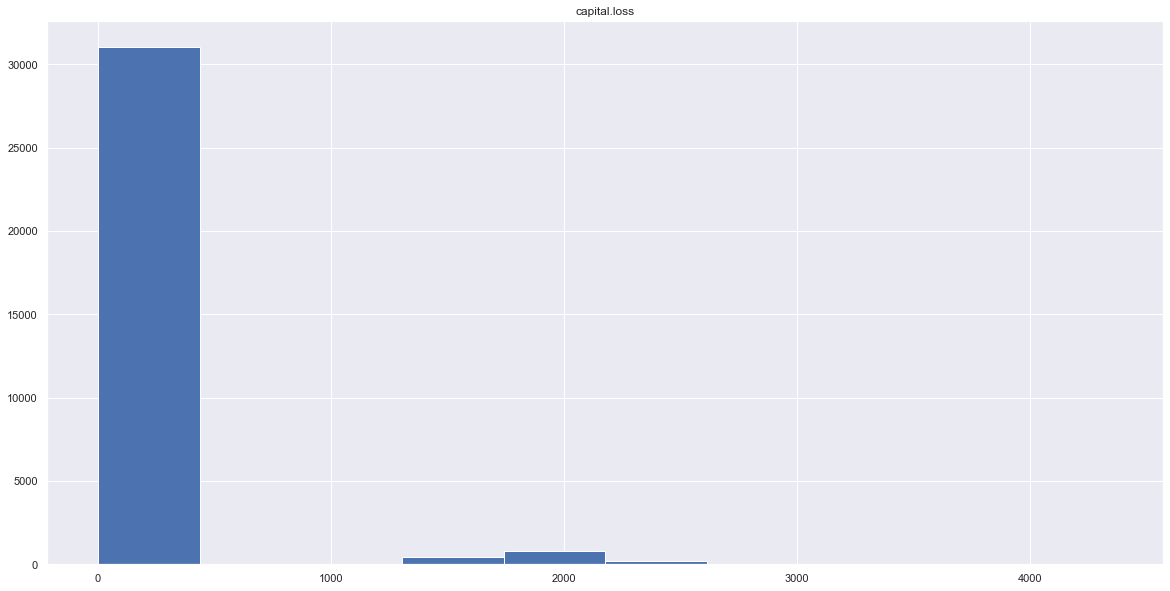

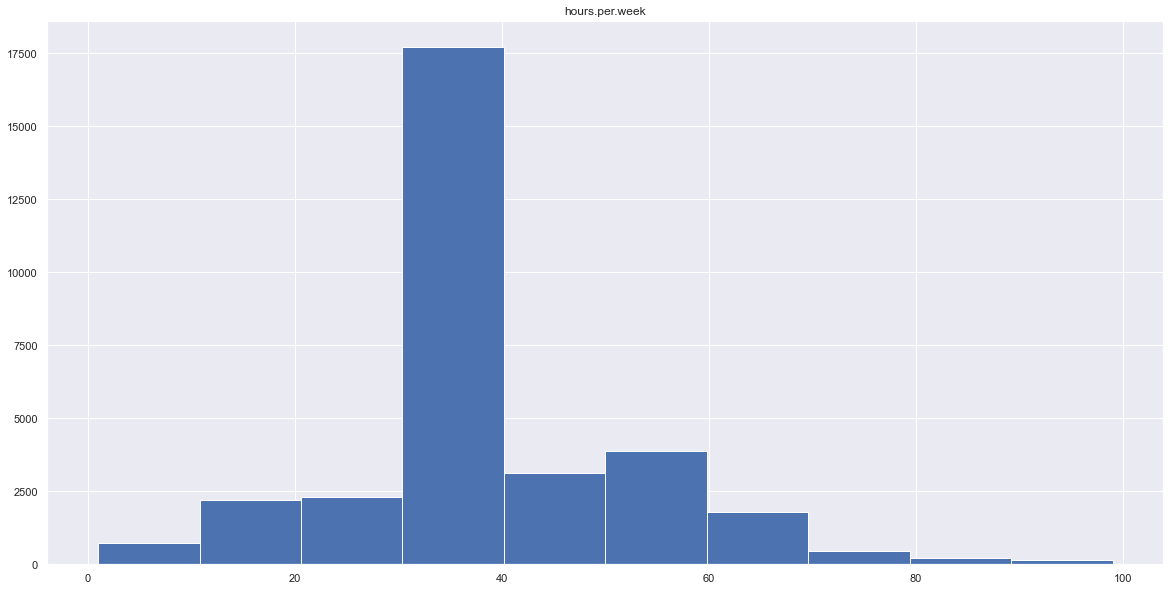

In [123]:
for i in X[numerical_feature]:
    plt.hist(X[i])
    plt.title(i)
    plt.show()

In [124]:
X = pd.concat([X, Y], axis=1)

In [125]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


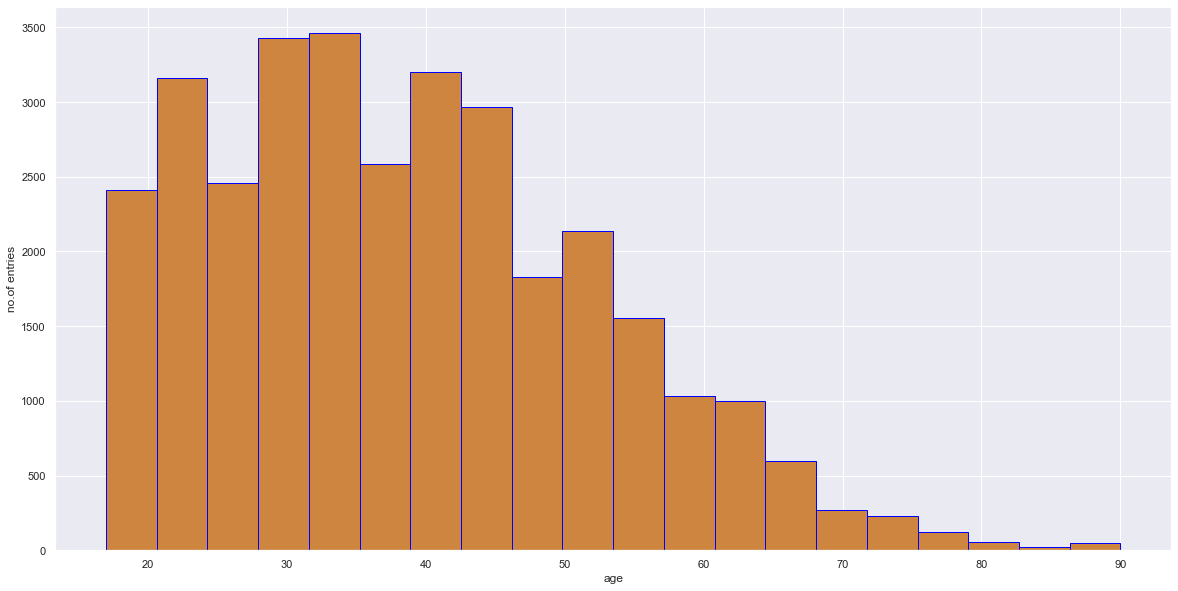

In [126]:
plt.hist(X['age'],
        facecolor='peru',
        edgecolor='blue',
        bins=20)
plt.xlabel('age')
plt.ylabel('no.of entries')

plt.show()

[Text(0.5, 1.0, 'age vs income')]

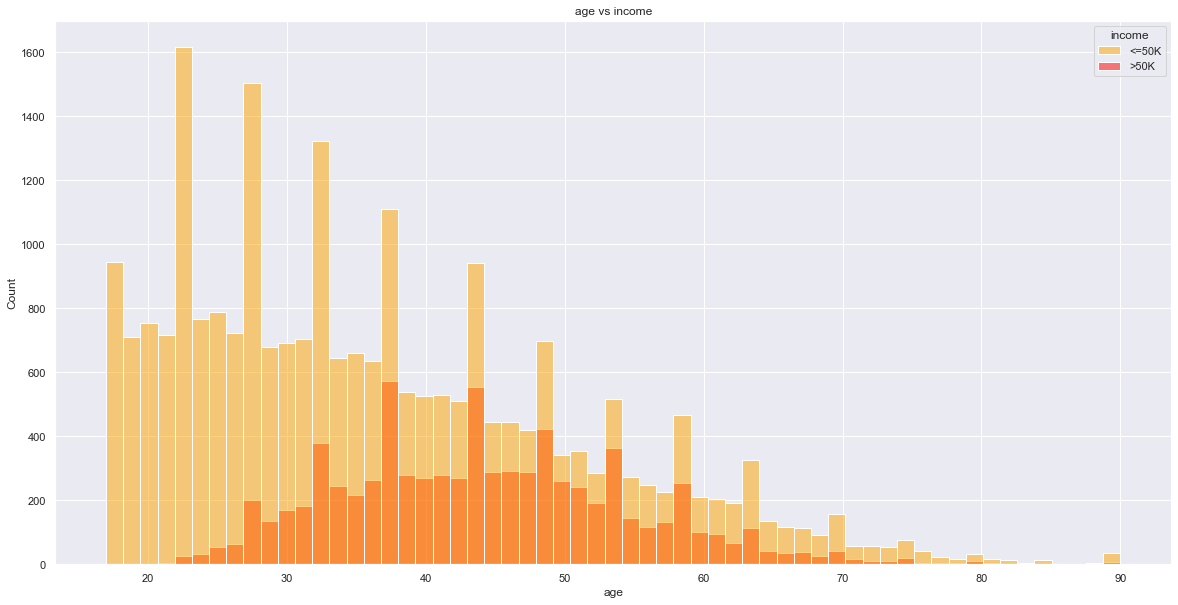

In [127]:
colors = ['orange', 'red']
sns.set(rc = {'figure.figsize':(20,10)})
sns.histplot(data=X, x="age", hue="income", palette=colors).set(title='age vs income')

Fig shows the age distribution
among the entries in our dataset. The ages range from 17 to 90 years old with the majority of
entries between the ages of 25 and 50 years.

In [128]:
# colors = ['orange', 'red']
# sns.set(rc = {'figure.figsize':(20,10)})
# sns.histplot(data=X, x="age", hue="income", palette=colors)

Looking at the graph, we can see that there is a
significant amount of variance between the ratio of >50k to <=50k between the age groups.
The most interesting ratios to note are those of groups 17-20, 71-80, and 81-90 where there is
almost no chance to have an income of greater than $50,000. The ratio of entries labeled >50k to <=50k for age groups 21-30, 31-40, 41-50, and 51-60 vary significantly as well.

<AxesSubplot:title={'center':'Highest level of education distribution'}, xlabel='level of education', ylabel='no.of entries'>

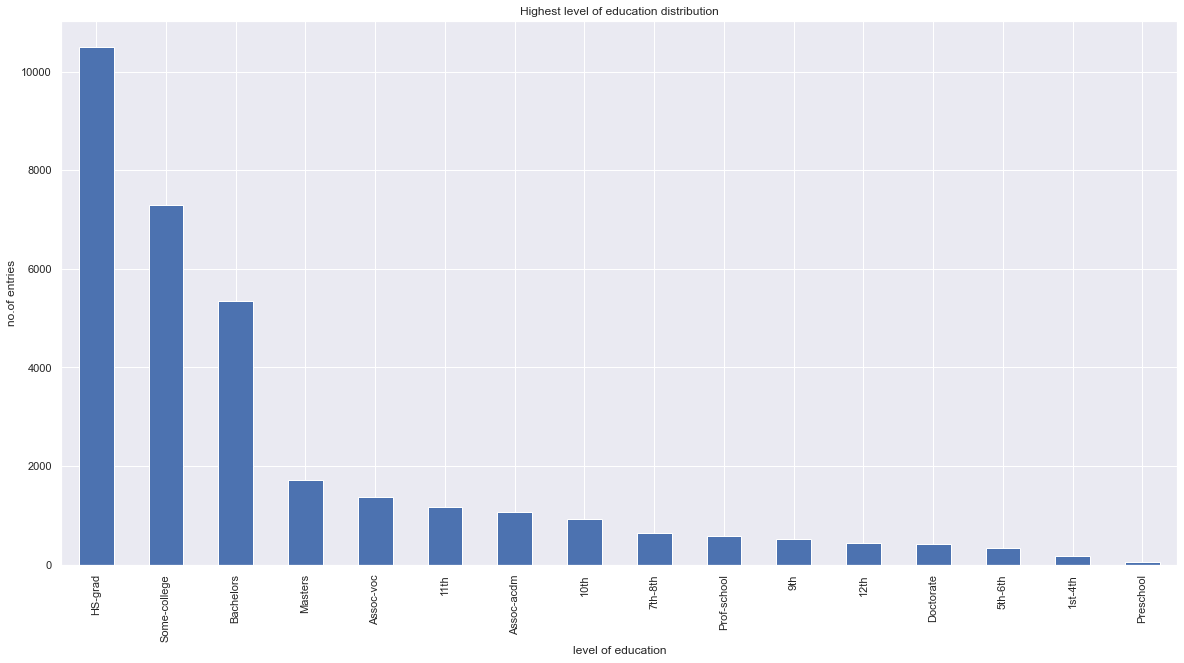

In [129]:
plt.title('Highest level of education distribution')
plt.xlabel('level of education')
plt.ylabel('no.of entries')
X['education'].value_counts().plot.bar()


Figure shows the distribution of the different levels of education among individuals in the dataset.Most of the individuals in the dataset have at most a high school education while only a small portion have a doctorate. We think this is a fair representation. 

[Text(0.5, 1.0, 'education vs income')]

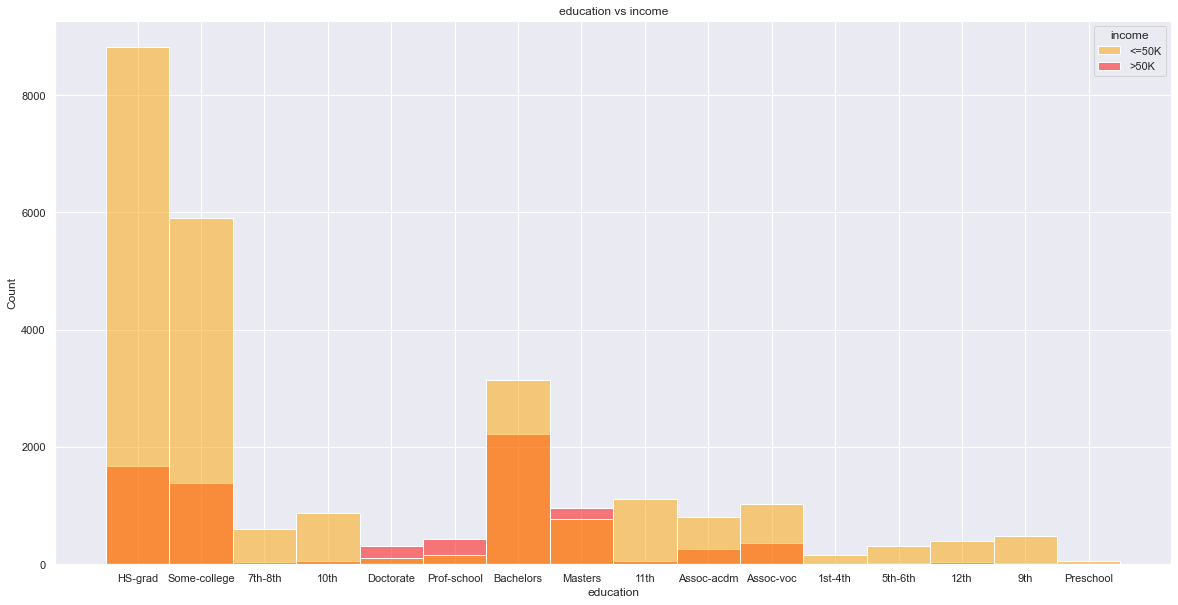

In [130]:
colors = ['orange', 'red']
sns.set(rc = {'figure.figsize':(20,10)})
sns.histplot(data=X, x="education", hue="income", palette=colors).set(title='education vs income')

Fig shows the relationship between the highest level of education and the number of people labeled >50k and <=50k.For the most part, a higher level of education is correlated to a higher percentage of individuals with the label >50k. One interesting statistic to note is the ratio of individuals labeled >50k to <=50k is almost the same between those that have a doctorate and those that went to a professional school (Prof-school).

<AxesSubplot:title={'center':'Work class distribution'}, xlabel='Work-Class', ylabel='no.of entries'>

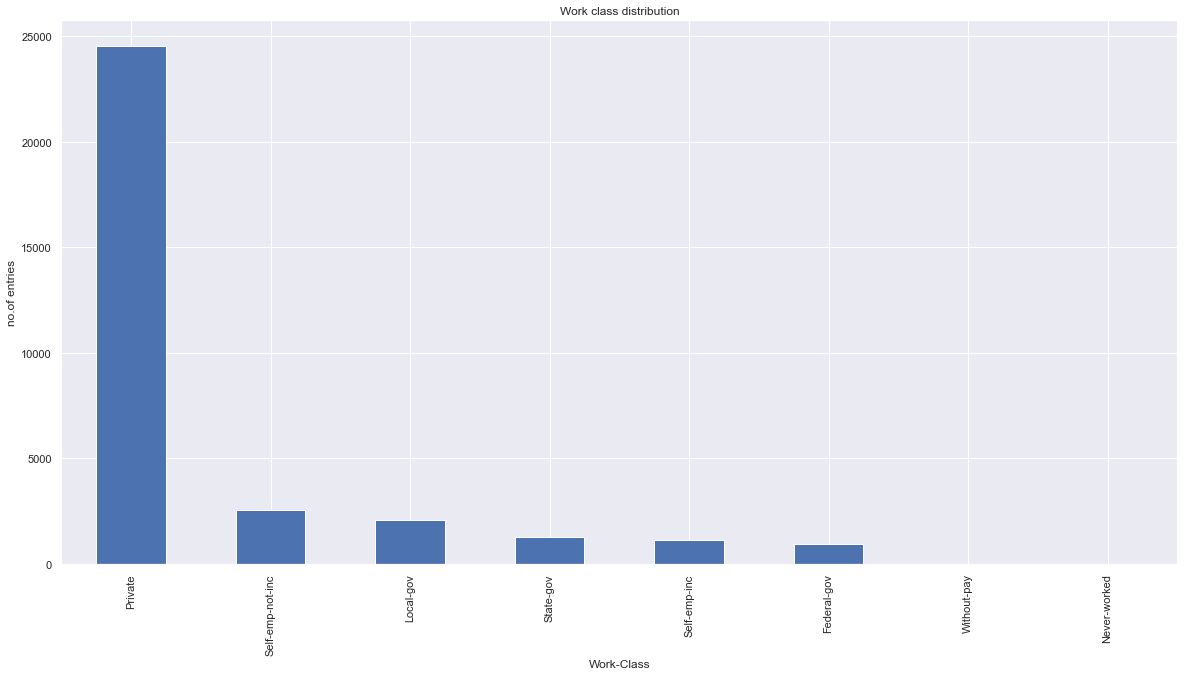

In [131]:
plt.title('Work class distribution')
plt.xlabel('Work-Class')
plt.ylabel('no.of entries')
X['workclass'].value_counts().plot.bar()

[Text(0.5, 1.0, 'work-class vs income')]

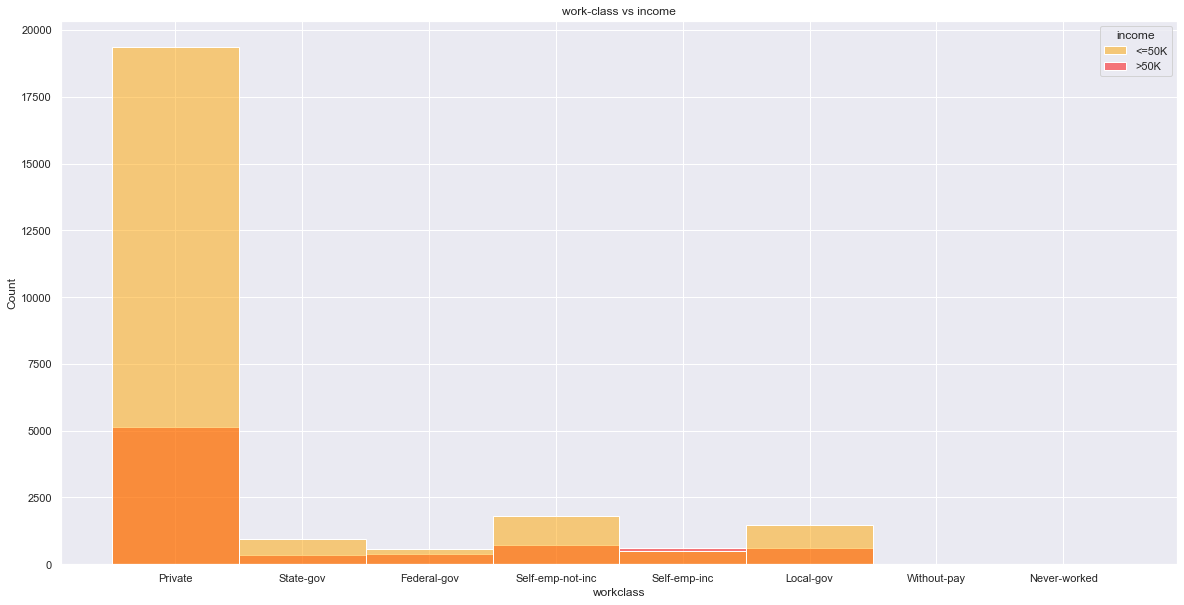

In [132]:
colors = ['orange', 'red']
sns.set(rc = {'figure.figsize':(20,10)})
sns.histplot(data=X, x="workclass", hue="income",palette=colors).set(title='work-class vs income')

Fig above depicts that the majority of the individuals work in the private sector.The probabilities of making >50K are similar among the work classes except for self-emp-inc and federal government. Federal government is seen as the most elite in the public sector, which most likely explains the higher chance of earning >50K.
Self-employed-incorporated implies that the individual owns their own company , which means earnings >50K.

<AxesSubplot:title={'center':'Occupation distribution'}, xlabel='Occupation', ylabel='no.of entries'>

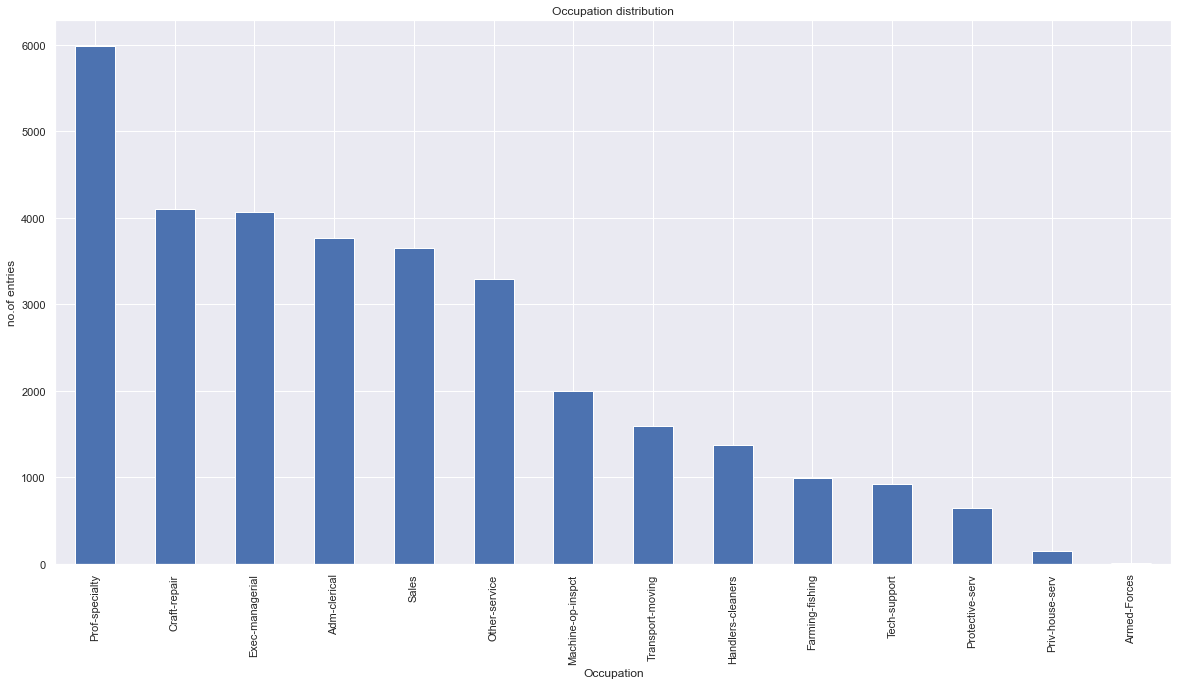

In [133]:
plt.title('Occupation distribution')
plt.xlabel('Occupation')
plt.ylabel('no.of entries')
X['occupation'].value_counts().plot.bar()

In above fig,there is a somewhat uniform distribution of occupations in the dataset, disregarding the absence of Armed Forces.

[Text(0.5, 1.0, 'occupation vs income')]

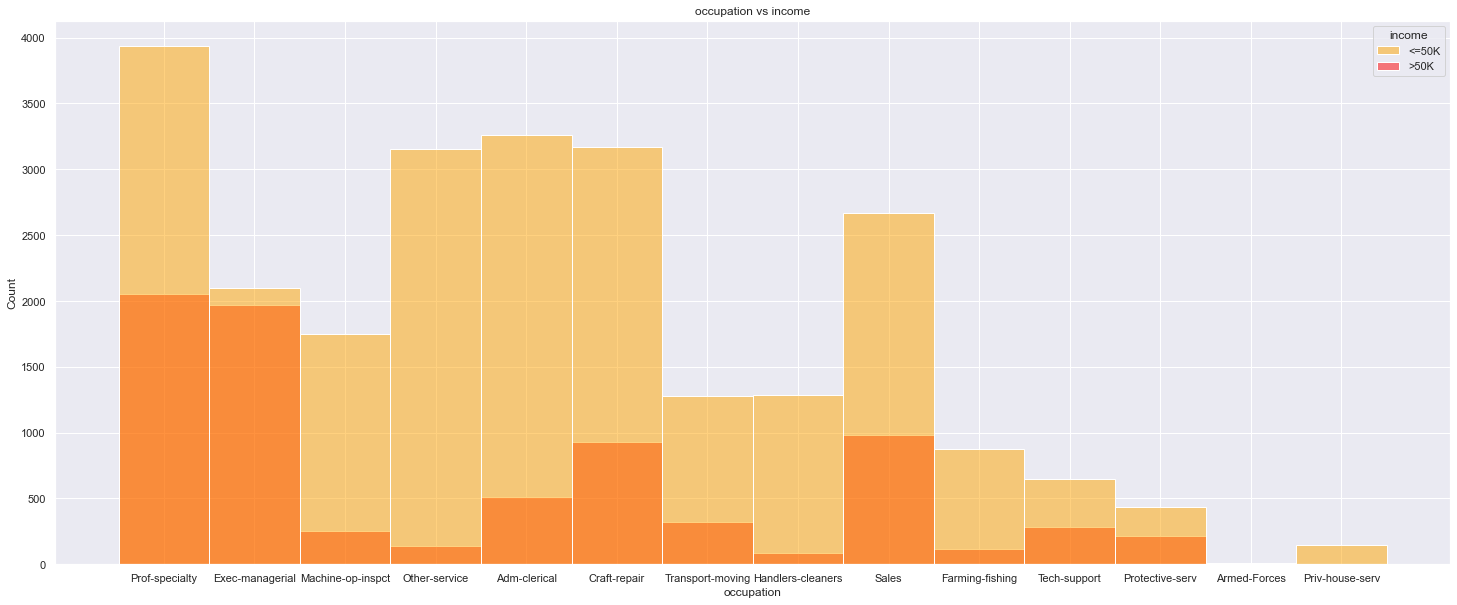

In [134]:
colors = ['orange', 'red']
sns.set(rc = {'figure.figsize':(25,10)})
sns.histplot(data=X, x="occupation", hue="income",palette=colors).set(title='occupation vs income')

However, looking at above Figure  Occupation vs Income, exec-managerial and prof-specialty stand out as having very high percentages of
individuals making over >50K. In addition, the percentages for Farming-fishing, Other-service and Handlers-cleaners are significantly lower than the rest of the distribution.


<AxesSubplot:title={'center':'hours per week distribution'}, xlabel='hours.per.week', ylabel='no.of entries'>

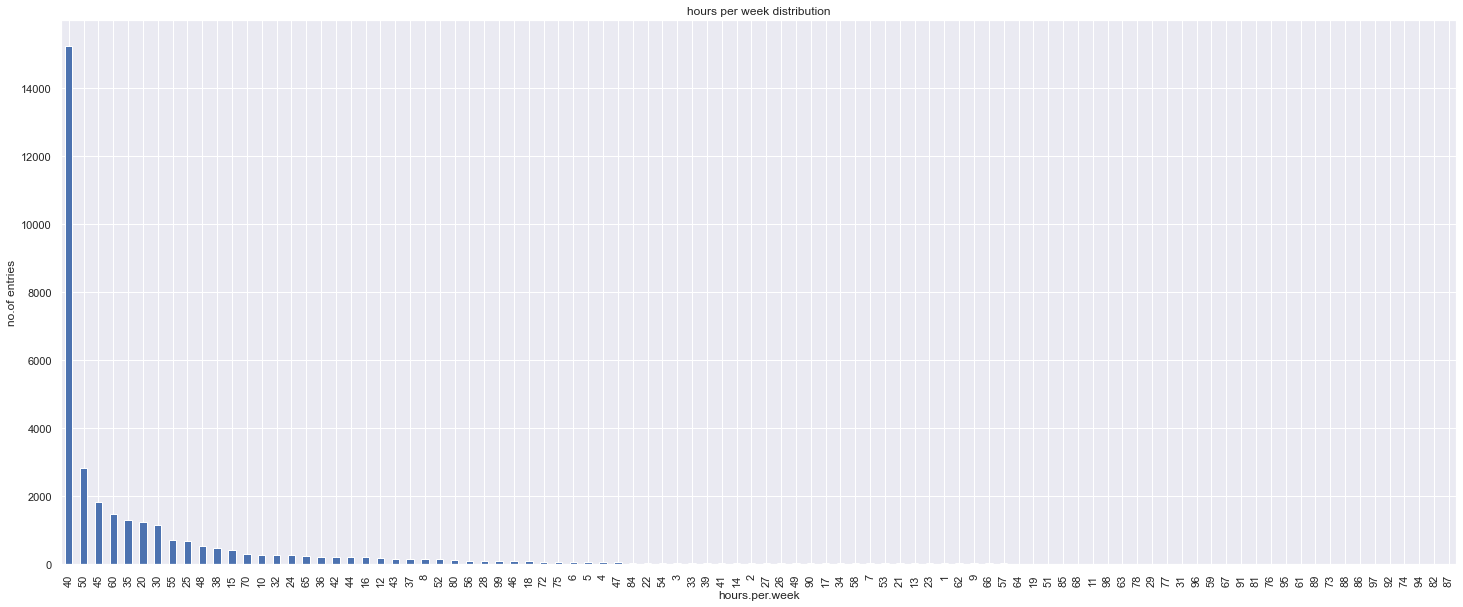

In [135]:
plt.title('hours per week distribution')
plt.xlabel('hours.per.week')
plt.ylabel('no.of entries')
X['hours.per.week'].value_counts().plot.bar()

Fig depicts ,the vast majority of individuals are working 40 hour
weeks which is expected as the societal norm. Regardless of the nonuniform distribution,


[Text(0.5, 1.0, 'hours.per.week vs income')]

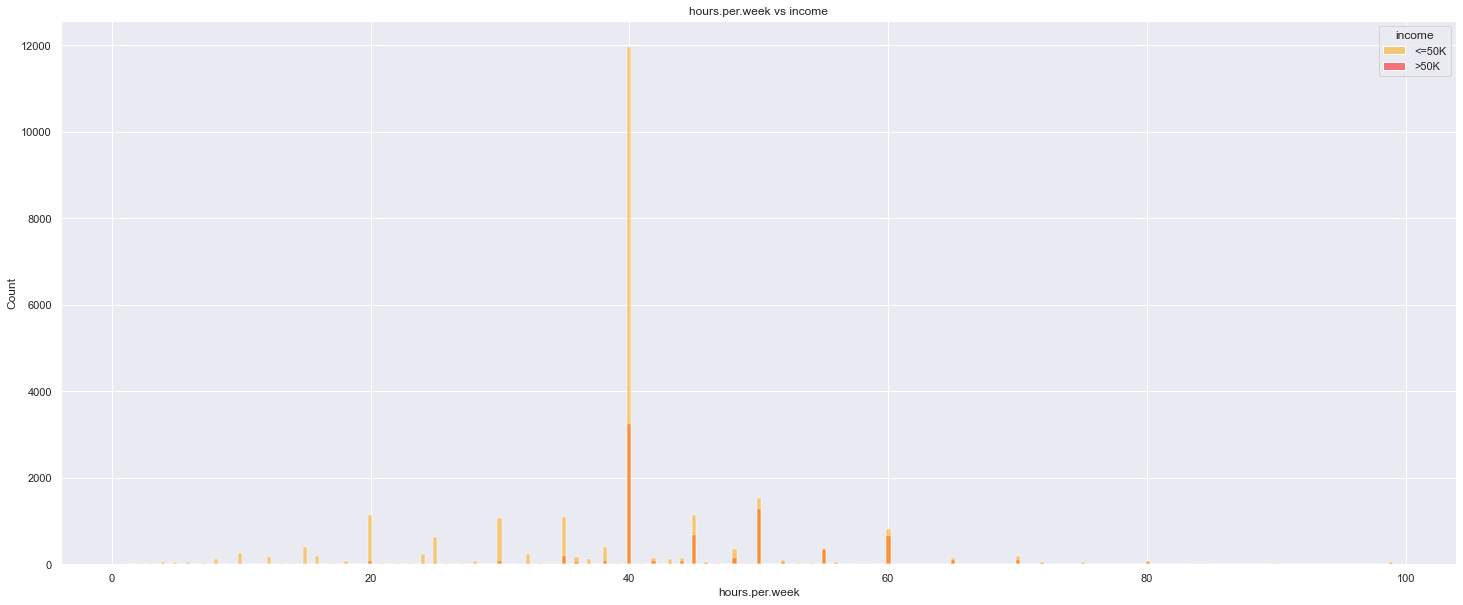

In [136]:
colors = ['orange', 'red']
sns.set(rc = {'figure.figsize':(25,10)})
sns.histplot(data=X, x="hours.per.week", hue="income",palette=colors).set(title='hours.per.week vs income')

shows that the percentage of individuals making over >50K drastically
decreases when less than 40 hours per week, and increases significantly when greater than
40 hours per week.

<AxesSubplot:title={'center':'race distribution'}, xlabel='race', ylabel='no.of entries'>

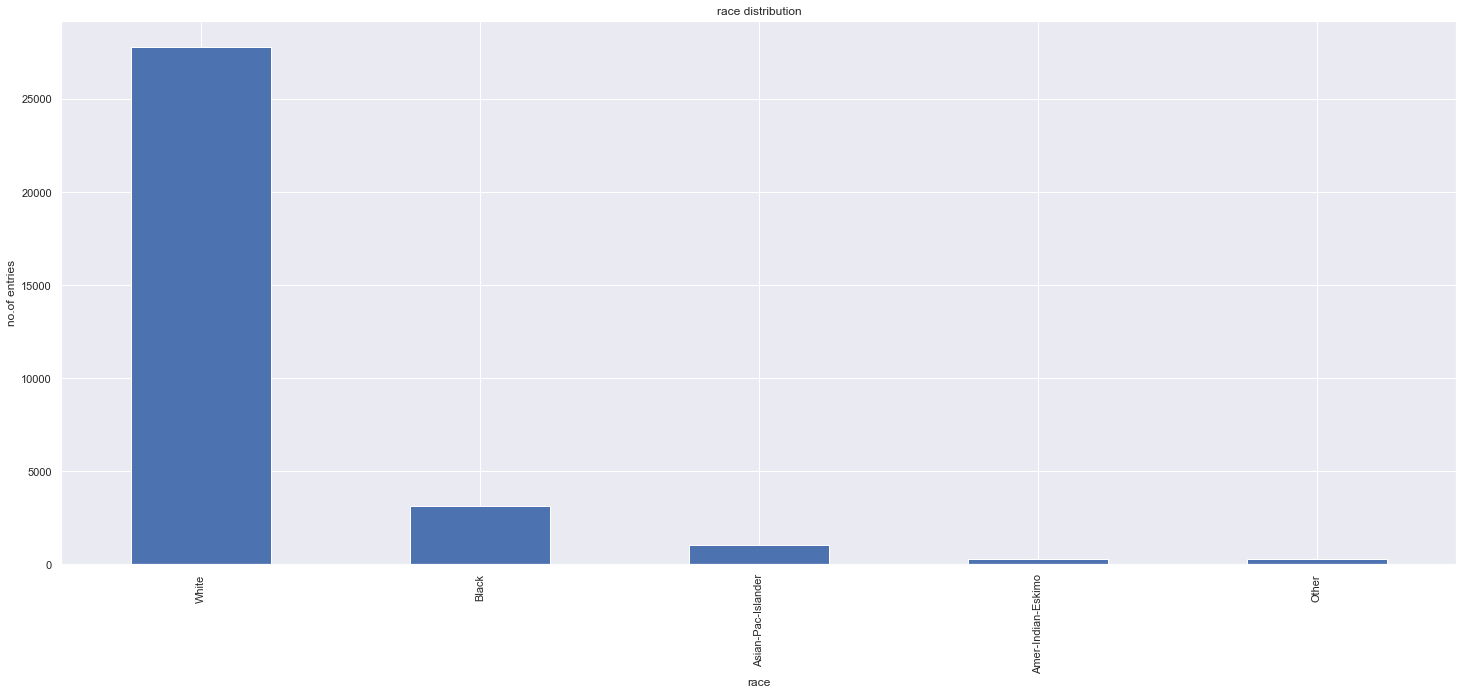

In [137]:
plt.title('race distribution')
plt.xlabel('race')
plt.ylabel('no.of entries')
X['race'].value_counts().plot.bar()

[Text(0.5, 1.0, 'race vs income')]

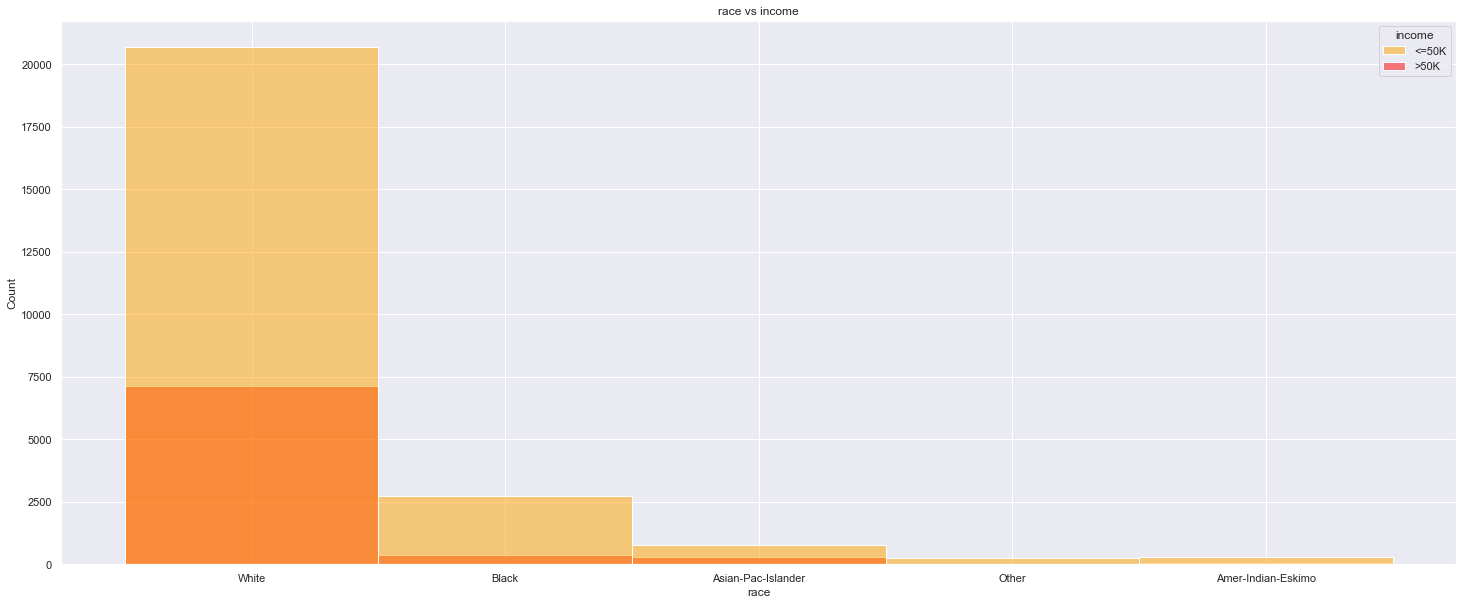

In [138]:
colors = ['orange', 'red']
sns.set(rc = {'figure.figsize':(25,10)})
sns.histplot(data=X, x="race", hue="income",palette=colors).set(title='race vs income')

Fig shows, it seems like the feature could be useful in our prediction model, as
Whites and Asians have a larger percentage of entries >50K than the rest of
the races. However, the sample size of Whites in the dataset is disproportionately large in
comparison to all other races. The second most represented group is Blacks with less than
5000 entries. The lack of equal distribution caused us to consider not utilizing this attribute in
our prediction model.

<AxesSubplot:title={'center':'sex distribution'}, xlabel='sex', ylabel='no.of entries'>

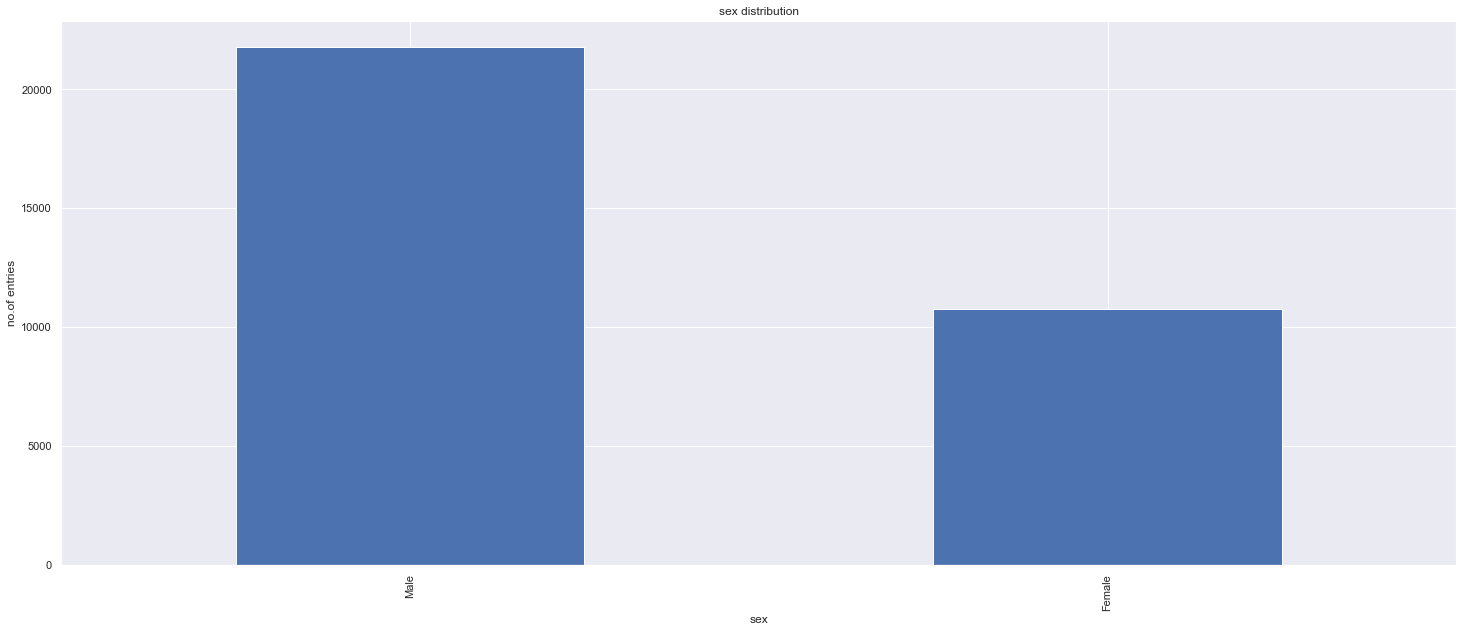

In [139]:
plt.title('sex distribution')
plt.xlabel('sex')
plt.ylabel('no.of entries')
X['sex'].value_counts().plot.bar()

Fig shows, we can see that there is almost double the sample size of males in comparison
to females in the dataset. While this may not affect our predictions too much, the distribution
of income can.

[Text(0.5, 1.0, 'sex vs income')]

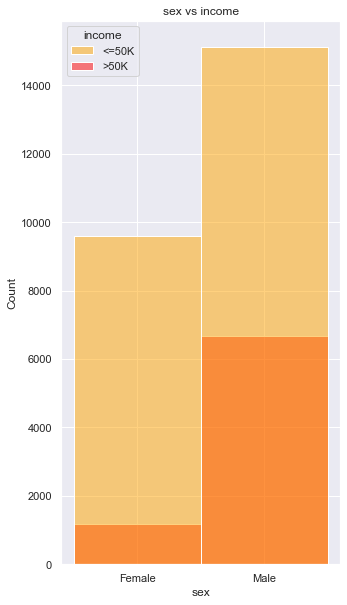

In [140]:
colors = ['orange', 'red']
sns.set(rc = {'figure.figsize':(5,10)})
sns.histplot(data=X, x="sex", hue="income",palette=colors).set(title='sex vs income')

Fig shows, the percentage of males who make >50K is much greater than the percentage of females that make the same amount. This
will certainly be a significant factor, and should be a feature considered in our prediction
model.

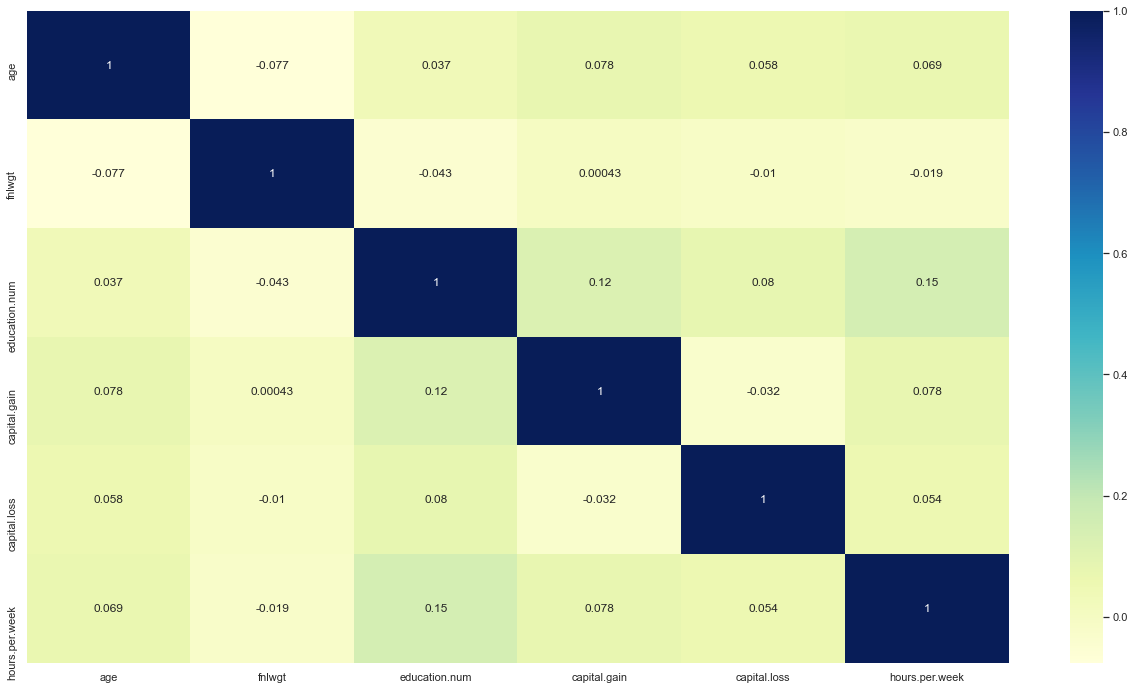

In [141]:
#heatmap
plt.figure(figsize = (22,12))
sns.heatmap(X[numerical_feature].corr(),annot = True, cmap= 'YlGnBu')
plt.show()